In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,MaxPooling2D
from tensorflow.keras.models import Model

In [8]:
cifar = tf.keras.datasets.cifar10
#Load the data
(x_train,y_train),(x_test,y_test) = cifar.load_data()
#Rescale the input image
x_train,x_test = x_train/255.0,x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000,)


In [9]:
K = len(set(y_train))
print("number of classes = ",K)

number of classes =  10


In [10]:
#Build the model using functional API
i = Input(shape=x_train[0].shape)
"""
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
"""
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)


In [11]:
#Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Fit the model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3990 - accuracy: 0.5206 - val_loss: 1.1328 - val_accuracy: 0.6047
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9318 - accuracy: 0.6754 - val_loss: 1.5632 - val_accuracy: 0.5134
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7861 - accuracy: 0.7296 - val_loss: 0.7582 - val_accuracy: 0.7412
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6958 - accuracy: 0.7623 - val_loss: 0.8283 - val_accuracy: 0.7170
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6202 - accuracy: 0.7838 - val_loss: 0.6299 - val_accuracy: 0.7877
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5552 - accuracy: 0.8113 - val_loss: 0.5815 - val_accuracy: 0.8041
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5032 - accuracy: 0.8268 - val_loss: 0.6602 -

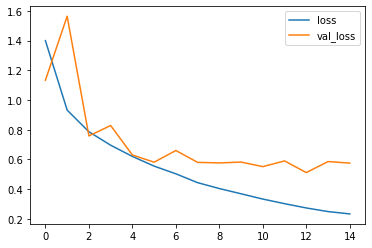

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

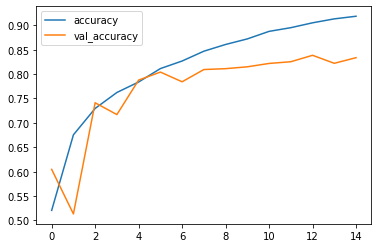

In [13]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [18]:
#Data Augmentation
batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epochs = x_train.shape[0]//batch_size
r = model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epochs,epochs=50)

Epoch 1/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4872 - accuracy: 0.8339 - val_loss: 0.5114 - val_accuracy: 0.8300
Epoch 2/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4654 - accuracy: 0.8427 - val_loss: 0.4411 - val_accuracy: 0.8508
Epoch 3/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4470 - accuracy: 0.8483 - val_loss: 0.4600 - val_accuracy: 0.8432
Epoch 4/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4350 - accuracy: 0.8505 - val_loss: 0.4286 - val_accuracy: 0.8567
Epoch 5/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4228 - accuracy: 0.8545 - val_loss: 0.4318 - val_accuracy: 0.8531
Epoch 6/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4124 - accuracy: 0.8601 - val_loss: 0.4373 - val_accuracy: 0.8568
Epoch 7/50
1562/1562 [==============================] - 47s 30ms/step - loss: 0.4009 - accuracy: 0.8628 - val_loss: 0.4394 -

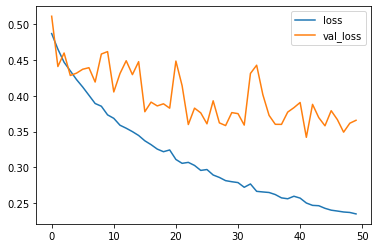

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

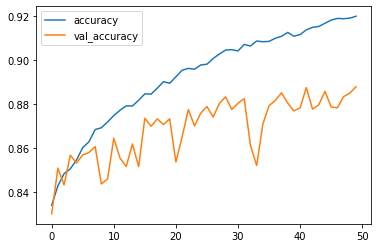

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()